In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

In [70]:
appl = pd.read_csv("data/appl.csv")
appl

,Date,Price,Open,High,Low,Vol.,Change %
0,06/12/2023,183.79,181.27,183.89,180.97,53.57M,1.56%
1,06/09/2023,180.96,181.50,182.23,180.63,48.90M,0.22%
2,06/08/2023,180.57,177.90,180.84,177.46,50.21M,1.55%
3,06/07/2023,177.82,178.44,181.21,177.32,61.94M,-0.78%
4,06/06/2023,179.21,179.96,180.12,177.43,64.34M,-0.21%
...,...,...,...,...,...,...,...
4995,08/08/2003,0.35,0.36,0.36,0.35,137.85M,-2.78%
4996,08/07/2003,0.36,0.35,0.36,0.35,174.97M,2.86%
4997,08/06/2003,0.35,0.36,0.36,0.35,245.47M,-2.78%
4998,08/05/2003,0.36,0.38,0.38,0.36,249.44M,-5.26%


In [71]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      4999 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [75]:
appl = appl.dropna(axis=0)
appl.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [73]:
appl["Date"] = pd.to_datetime(appl["Date"])
appl = appl.set_index("Date")
appl

C:\Users\haseong\AppData\Local\Temp\ipykernel_2412\4191344750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl["Date"] = pd.to_datetime(appl["Date"])


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53.57M,1.56%
2023-06-09,180.96,181.50,182.23,180.63,48.90M,0.22%
2023-06-08,180.57,177.90,180.84,177.46,50.21M,1.55%
2023-06-07,177.82,178.44,181.21,177.32,61.94M,-0.78%
2023-06-06,179.21,179.96,180.12,177.43,64.34M,-0.21%
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137.85M,-2.78%
2003-08-07,0.36,0.35,0.36,0.35,174.97M,2.86%
2003-08-06,0.35,0.36,0.36,0.35,245.47M,-2.78%


In [76]:
def convertVol(num):
    if type(num) == float or type(num) == int:
        return num
    elif 'K' in num:
        return float(num.replace('K', '')) * 1000
    elif 'M' in num:
        return float(num.replace('M', '')) * 1000000 
    elif 'B' in num:
        return float(num.replace('B', '')) * 1000000000
    
appl['Vol.'] = appl['Vol.'].apply(convertVol)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53570000.0,1.56%
2023-06-09,180.96,181.50,182.23,180.63,48900000.0,0.22%
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55%
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78%
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21%
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78%
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86%
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78%


In [77]:
def convertCharge(num):
    if type(num) == float or type(num) == int:
        return num
    elif '%' in num:
        return float(num.replace('%', ''))
    
appl["Change %"] = appl["Change %"].apply(convertCharge)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53570000.0,1.56
2023-06-09,180.96,181.50,182.23,180.63,48900000.0,0.22
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78


In [93]:
appl = appl.sort_index()
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2003-08-04,0.38,0.37,0.38,0.36,230120000.0,2.70
2003-08-05,0.36,0.38,0.38,0.36,249440000.0,-5.26
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78
...,...,...,...,...,...,...
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55


In [78]:
appl.describe()

,Price,Open,High,Low,Vol.,Change %
count,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000
mean,38.098974,38.073147,38.501766,37.659396,4.143011e+08,0.131772
std,47.987620,47.937177,48.520649,47.397391,3.954786e+08,2.374355
min,0.350000,0.350000,0.350000,0.340000,3.520000e+07,-75.070000
25%,4.915000,4.940000,4.990000,4.855000,1.212850e+08,-0.865000
50%,19.670000,19.760000,19.890000,19.460000,2.820400e+08,0.040000
75%,43.815000,43.775000,44.070000,43.545000,5.844350e+08,1.240000
max,183.790000,182.630000,184.950000,180.970000,3.370000e+09,13.870000


<AxesSubplot: >

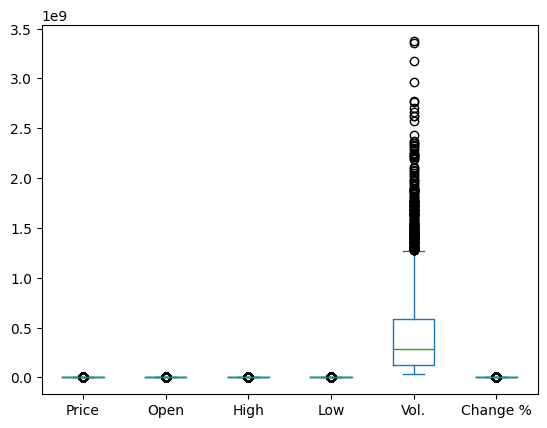

In [79]:
appl.plot.box()

Text(0, 0.5, 'Price')

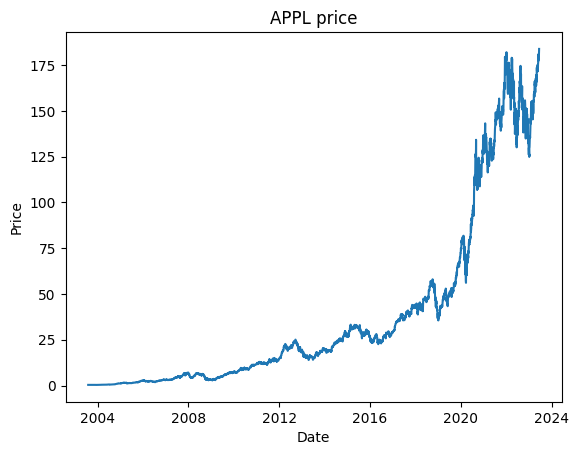

In [80]:
plt.plot(appl.index, appl["Price"])
plt.title("APPL price")
plt.xlabel("Date")
plt.ylabel("Price")

In [114]:
X = appl.iloc[:-1].values
y = appl.iloc[1:, 0].values

rf = RandomForestRegressor(oob_score=True, random_state=42) 
rf.fit(X, y)

yhat_rf = rf.predict(X)
mae_rf = metrics.mean_absolute_error(y, yhat_rf)
mse_rf = metrics.mean_squared_error(y, yhat_rf)

print(f'OOB score:      {rf.oob_score_}')
print(f'MAE:            {mae_rf}')
print(f'RMSE:           {mse_rf}')

OOB score:      0.9992835526495576
MAE:            0.21663587434973977
RMSE:           0.22660401424369686


In [108]:
a = appl.iloc[-1].values
rf.predict([a])

array([180.7747])

MAE:            0.11521261261260572
RMSE:           0.08101488540539653
R^2:           0.9996010906521906


Text(0, 0.5, 'Price')

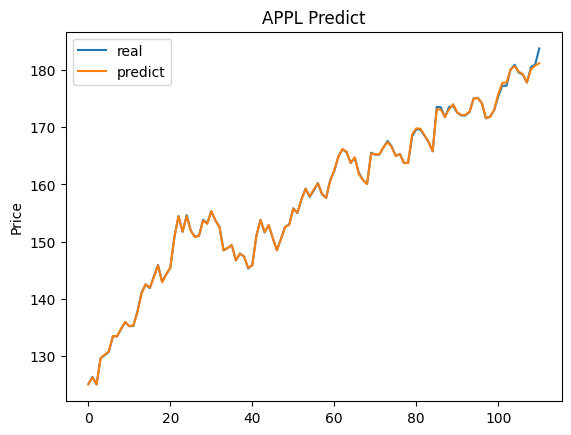

In [142]:
train = appl[appl.index.year < 2023]
valid = appl[appl.index.year == 2023]

X_train = train.values
X_valid = valid.values
y_train = train.iloc[:, 0].values
y_valid = valid.iloc[:, 0].values


train

rf = RandomForestRegressor(random_state=42) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = rf.score(X_valid, y_valid)

print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.plot(y_valid)
plt.plot(yhat)
plt.legend(["real", "predict"])
plt.title("APPL Predict")
plt.ylabel("Price")